In [2]:

import os
os.chdir("../../..")


In [3]:
import os
print(os.getcwd())

/home/ali/tum/motion_planning/social_ai_practical_course


In [4]:
# Import libraries and data
import matplotlib.pyplot as plt
import os

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.utils.evaluate_and_save import evaluate_and_save
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = colum.evaluate_and_saves

#from src.data_processing.create_vis_data import s_x, s_y, v_x, v_y, a_x, a_y 


/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


# Ballistic Integration

## Matrix creation

and same model 
but relative speed, position and acceleration

In [5]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [6]:
# Target vector y_a s(k+1)
y_a_x = s_x[2:]
y_a_y = s_y[2:]
y_a_x.shape
y_a_y.shape

# Target vector y_b v(k+1)
y_b_x = v_x[2:]
y_b_y = v_y[2:]
y_b_x.shape
y_b_y.shape


(205273,)

In [7]:
dt = 0.04
dt_2 = dt**2 /2
dt_2

0.0008

In [8]:

v_b_x_pred = v_x[1:-1] + dt* a_x[1:-1]
v_b_y_pred = v_y[1:-1] + dt* a_y[1:-1]


In [9]:

s_a_x_pred = s_x[1:-1] +  dt * v_x[1:-1] + dt_2 * a_x[0:-2]
s_a_y_pred = s_y[1:-1] +  dt * v_y[1:-1] + dt_2 * a_y[0:-2]

## Evaluation


In [10]:
def evaluate_no_dir(y_test, y_pred):
    # Visualize the results

    plt.figure(figsize=(8, 4))
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')


    # Scatter plot of actual vs. predicted values with locus (line of identity)
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Locus
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residual plot
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    plt.tight_layout()
    plt.show()
 

Mean Squared Error (MSE): 1.0732e+01
Mean Absolute Error (MAE): 1.1499e-01
R-squared (R²) Score: 9.9021e-01


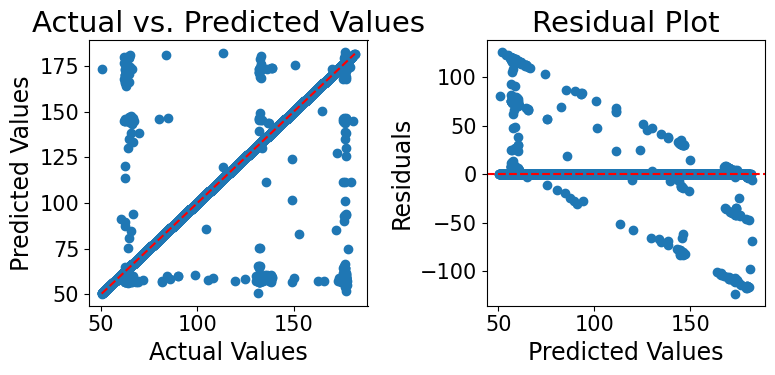

Mean Squared Error (MSE): 4.0977e+00
Mean Absolute Error (MAE): 7.3873e-02
R-squared (R²) Score: 9.9056e-01


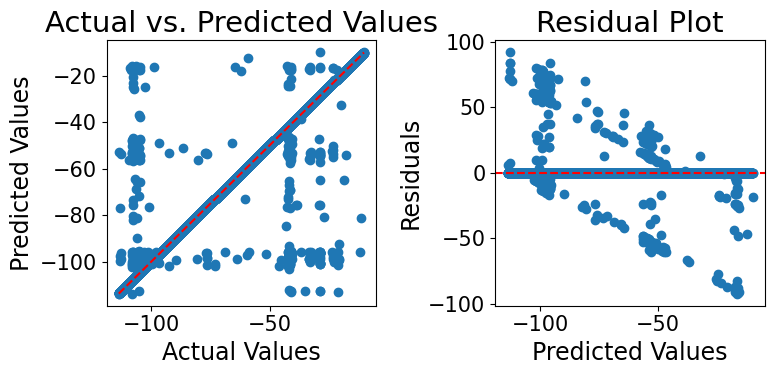

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


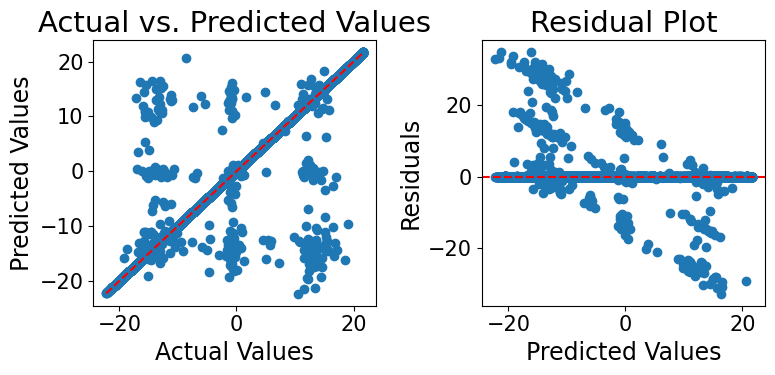

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


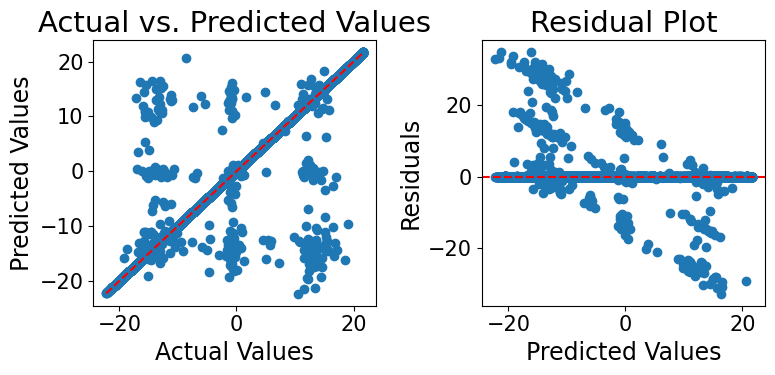

In [11]:
save_dir = '/home/ali/tum/motion_planning/social_ai_practical_course/reports/figures/ballistic_int'
evaluate_no_dir(y_a_x, s_a_x_pred )
evaluate_no_dir(y_a_y, s_a_y_pred )
evaluate_no_dir(y_b_x, v_b_x_pred )
evaluate_no_dir(y_b_x, v_b_x_pred )

Mean Squared Error (MSE): 1.0732e+01
Mean Absolute Error (MAE): 1.1499e-01
R-squared (R²) Score: 9.9021e-01


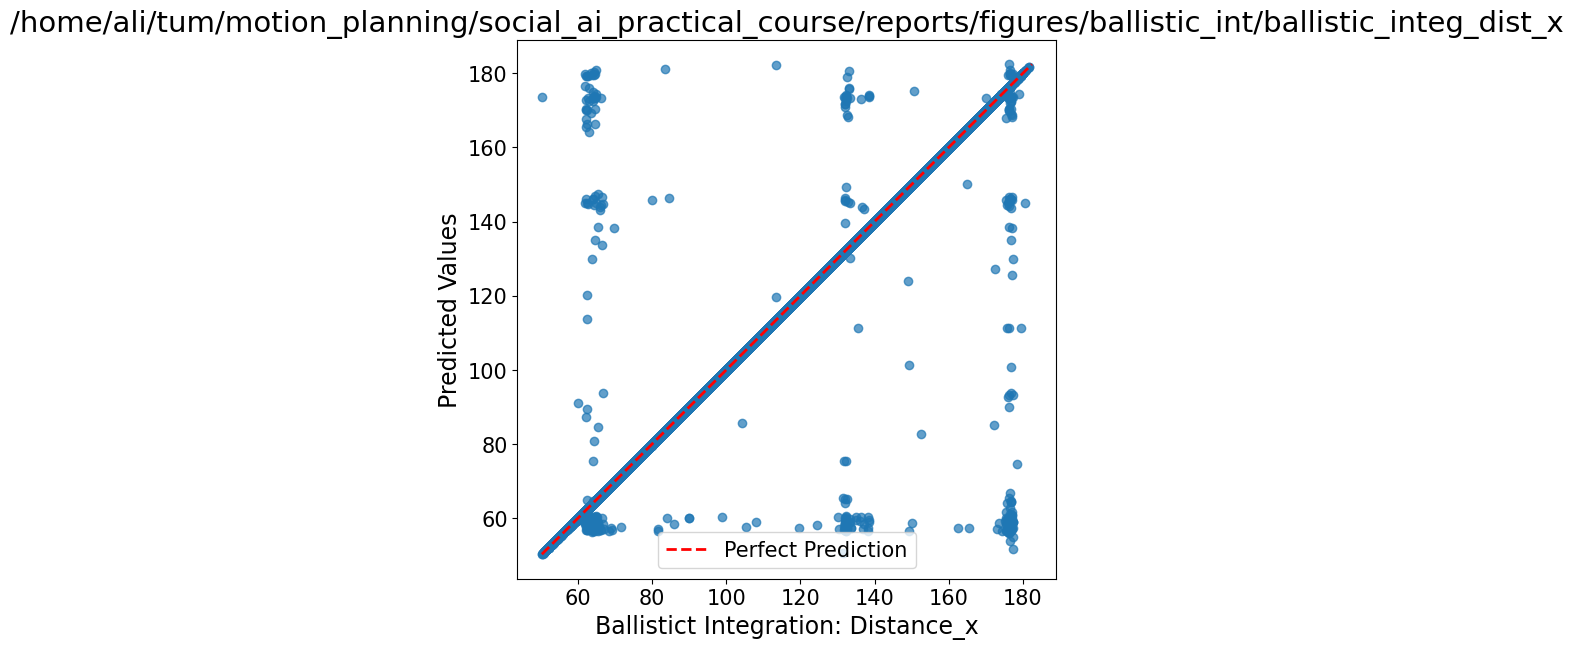

Mean Squared Error (MSE): 4.0977e+00
Mean Absolute Error (MAE): 7.3873e-02
R-squared (R²) Score: 9.9056e-01


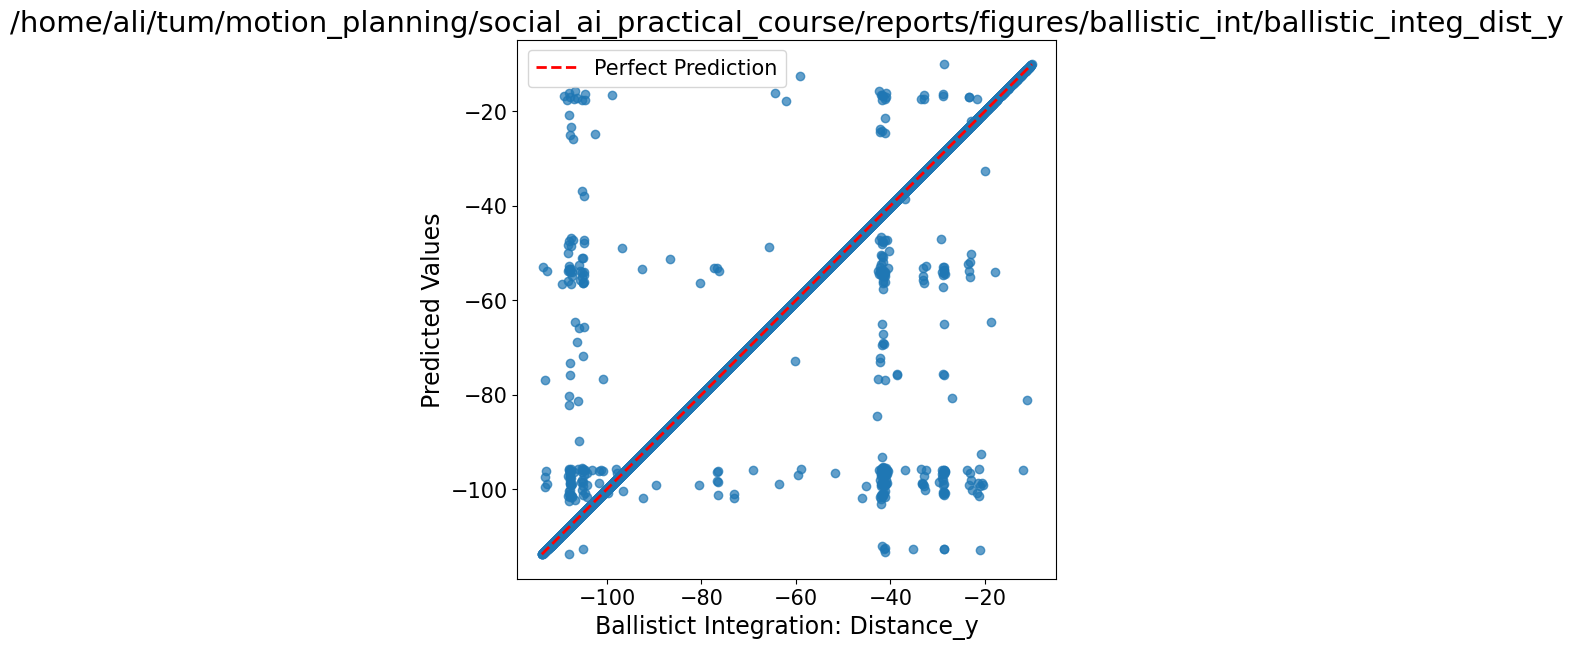

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


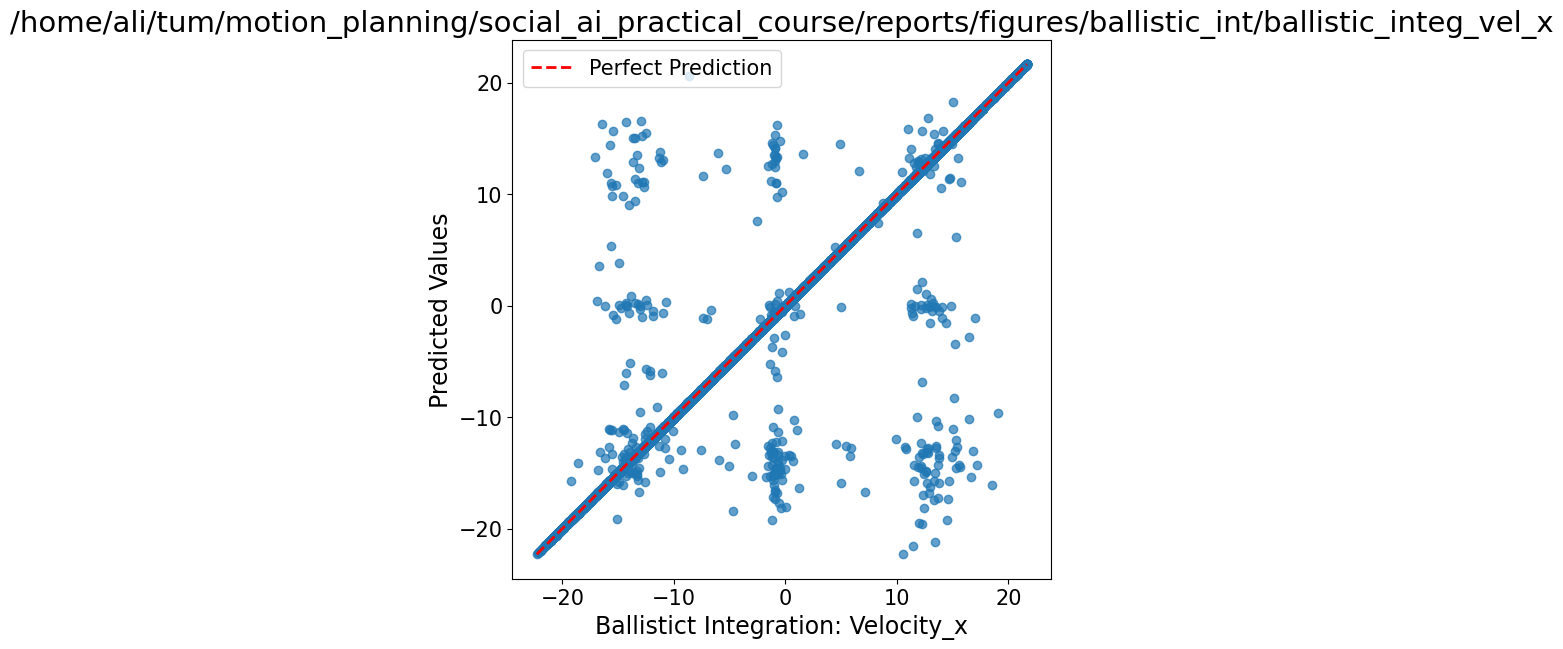

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


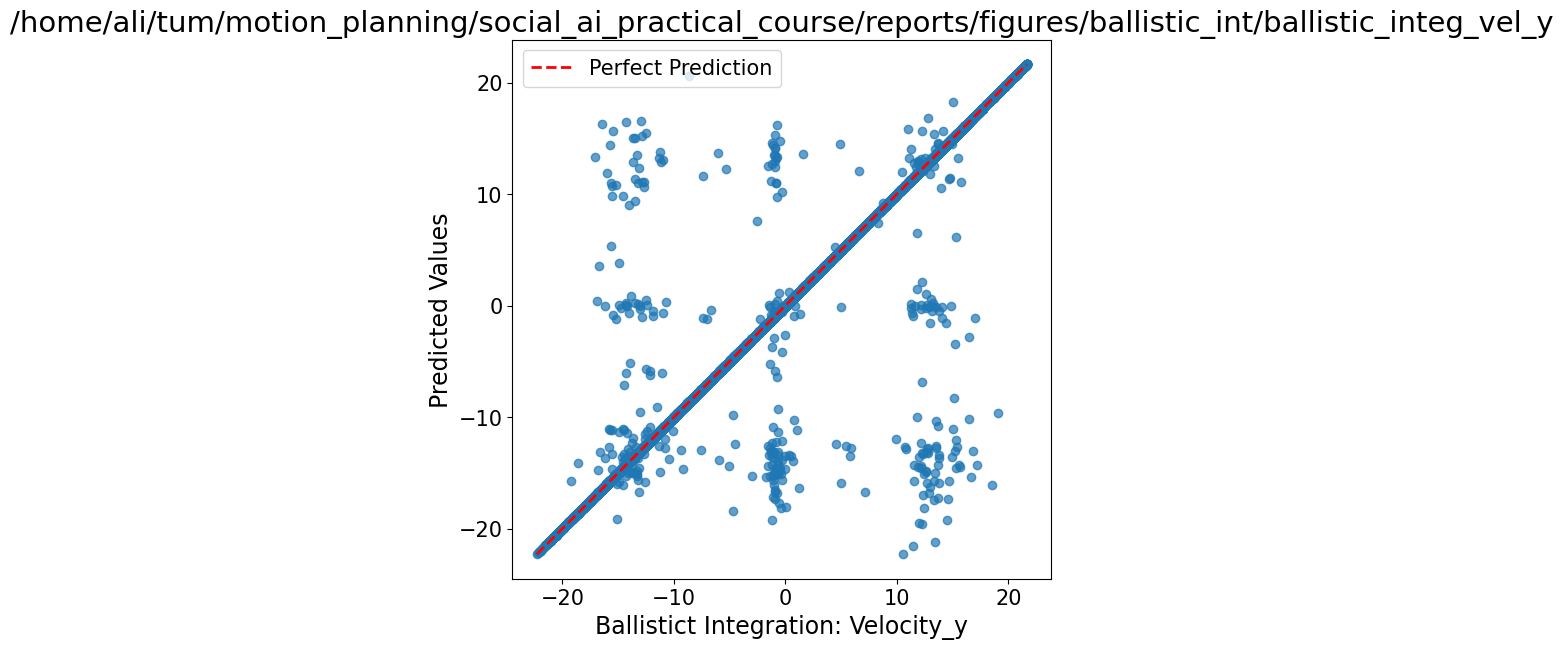

In [12]:
save_dir = '/home/ali/tum/motion_planning/social_ai_practical_course/reports/figures/ballistic_int'
evaluate_and_save(y_a_x, s_a_x_pred, os.path.join(save_dir, 'ballistic_integ_dist_x'), 'Ballistict Integration: Distance_x')
evaluate_and_save(y_a_y, s_a_y_pred, os.path.join(save_dir, 'ballistic_integ_dist_y'), 'Ballistict Integration: Distance_y')
evaluate_and_save(y_b_x, v_b_x_pred, os.path.join(save_dir,  'ballistic_integ_vel_x'), 'Ballistict Integration: Velocity_x')
evaluate_and_save(y_b_x, v_b_x_pred, os.path.join(save_dir,  'ballistic_integ_vel_y'), 'Ballistict Integration: Velocity_y')

In [13]:

import pandas as pd
track_vis_path = 'data/processed/visualization_data/ground_truth/00_tracks.csv'
df = pd.read_csv(track_vis_path)
df.head()

df_new = df.iloc[:-2]
df_new['xCenter'] = s_a_x_pred 
df_new['yCenter'] = s_a_y_pred 
df_new['xVelocity'] = v_b_x_pred 
df_new['yVelocity'] = v_b_y_pred 

df_new.to_csv('data/processed/visualization_data/predicted/00_tracks.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/visualization_data/ground_truth/00_tracks.csv'